In [70]:
DATA = 'F:\\brain-tumor-target\\train'

import pathlib
import pydicom
import numpy as np
from random import randint
from matplotlib import pyplot as plt

dataPath = pathlib.Path(DATA)

instance = list(dataPath.iterdir())[0]
instanceType = list(instance.iterdir())[0]



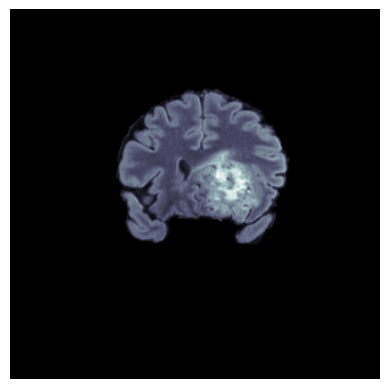

In [76]:
int = randint(0, len(list(instanceType.iterdir())) - 1)
dcm = pydicom.dcmread(str(list(instanceType.iterdir())[int]))

image = dcm.pixel_array
plt.imshow(image, cmap=plt.cm.bone)
plt.axis('off')
plt.show()

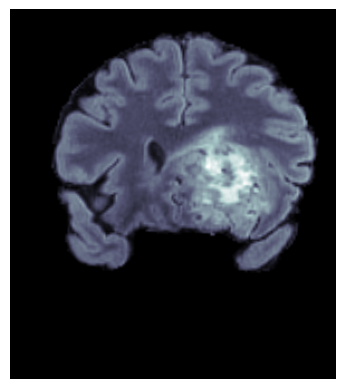

In [77]:
leftBuffer = 110
rightBuffer = image.shape[1] - 110

upBuffer = 90
downBuffer = image.shape[0] - 90

cutimage = image[upBuffer:downBuffer, leftBuffer:rightBuffer]
plt.imshow(cutimage, cmap=plt.cm.bone)
plt.axis('off')
plt.show()


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


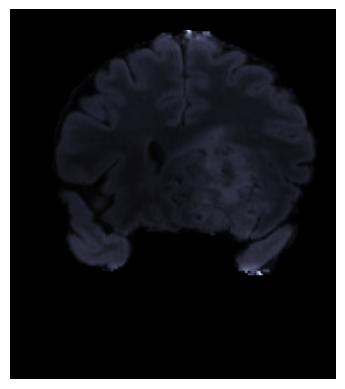

In [85]:
# no visible difference in normalization or scaling

from sklearn.preprocessing import normalize
from sklearn.preprocessing import minmax_scale

print(cutimage)


newimg = (normalize(cutimage.reshape(-1, cutimage.shape[-1]))).reshape(cutimage.shape)


print(newimg)
plt.imshow(newimg, cmap=plt.cm.bone)
plt.axis('off')
plt.show()